In [ ]:
# Link to google docs containing Chat Logs 
# https://docs.google.com/document/d/17VTKtsxpeFy50NoBG436ajL1gSKi22PeBkZTCqyMAok/edit

In [ ]:
# Task 1

# While standard deviation and standard error of mean are related, they measure different aspects of data. 
# The standard deviation tells us how spread out the data is by measuring the dispersion of a set of data points from the mean, within a single sample.
# The standard error of the mean tells us how precise the sample mean is as an estimate of the total population mean by calculating how much variability we would expect in the sample means if we were to draw multiple samples from the same population. 

In [ ]:
# Task 2

# To create a 95% confidence interval which "covers 95% of the bootstrapped sample means" we would first have to calculate the margin of error.
# We would do this by multiplying our standar error of the mean by 1.96. 
# We would then construct the confidence interval as such: (mean - margin of error, mean + margin of error)
# This interval covers 95% of the bootstrapped sample means. In other words, if you were to resample the original data many times and calculate the mean of each sample (bootstrapping), 95% of those means would fall within the interval calculated. 

In [ ]:
# Task 3 

# Alternatively, you could just use bootstrap means to create the confidence interval. 
# First you would sort the bootstrap means in ascending order to facililtate the identification of the confidence interval bounds 
# Then you found find the 2.5th percentile and 97.5th precentile of the sorted bootstrap means. These will represent the lower and upper bounds of the 95% confidence interval. 

In [1]:
# Task 4

import pandas as pd
import numpy as np

# Load the data and preprocess
df = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/2e9bd5a67e09b14d01f616b00f7f7e0931515d24/data/2020/2020-07-07/coffee_ratings.csv")
df = df.rename(columns={'country_of_origin': 'origin', 'total_cup_points': 'points'})

# Filter the data based on conditions
df = df[df['points'] > 65]  # Ignore very low scores
df = df[~df['origin'].isna()]  # Remove rows with unknown origin

# Fix character encoding issue
df['origin'] = df['origin'].str.replace("?", "'")  # Fix character encoding issue
df['origin_original'] = df.origin.copy().values  # Save original (corrected) names

# Function to calculate the 95% bootstrap confidence interval for a population parameter (mean, median, etc.)
def bootstrap_confidence_interval(data, statistic_function, n_bootstrap=1000, confidence_level=0.95):
    # Generate bootstrap samples and calculate the statistic for each sample
    bootstrap_statistics = [statistic_function(np.random.choice(data, size=len(data), replace=True)) for _ in range(n_bootstrap)]
    
    # Calculate the confidence interval
    lower_bound = np.percentile(bootstrap_statistics, (1 - confidence_level) / 2 * 100)
    upper_bound = np.percentile(bootstrap_statistics, (1 + confidence_level) / 2 * 100)
    
    return lower_bound, upper_bound

# Extract the points column as the data
points_data = df['points'].values

# Calculate the 95% bootstrap confidence interval for the population mean
ci_lower_mean, ci_upper_mean = bootstrap_confidence_interval(points_data, statistic_function=np.mean)

# Output the results for the mean
print(f"95% Bootstrap Confidence Interval for the Population Mean: ({ci_lower_mean:.2f}, {ci_upper_mean:.2f})")

# To calculate the 95% bootstrap confidence interval for the population median, change the statistic function to np.median
# Uncomment the following lines to calculate the confidence interval for the median
ci_lower_median, ci_upper_median = bootstrap_confidence_interval(points_data, statistic_function=np.median)

# Output the results for the median
print(f"95% Bootstrap Confidence Interval for the Population Median: ({ci_lower_median:.2f}, {ci_upper_median:.2f})")


95% Bootstrap Confidence Interval for the Population Mean: (82.05, 82.31)
95% Bootstrap Confidence Interval for the Population Median: (82.42, 82.67)


In [ ]:
# Task 5

# The role of the population parameter is that it is what the confidence interval aims to estimate. Since it is based on the entire population, it is generally not feasible to know this value exactly, especially for large populations
# On the other hand the sample statistic is used to consstruct the confidence interval. It is a calculated value based on a sample taken from the population. Examples include the sample mean and meadian. 

In [ ]:
# Task 6 

# Bootstraping includes using your original datay to creach a bunch of new samples, by picking random values again and again. You do this many times to see how things like the mean or median change. 
# The purpose of bootstraping is to figure out things like confidence intervals without needing to make a bunch of complicated assumptions. It especially works great when you dont have an abundance of data. 
# Start with your sample data with size n and calculate a mean. Then decide on what you might think the true average is (hypothesize basing on your mean calculation). Nex youll want to make a bunch of new samples from your original ratings. For example take random samples of the same size list of ratings but allow yourself to pick the same number more than once. Do this 100 times. For each of these new samples calculate the mean. Now from all those means you will want to find a range where the true average probably falls. Do this by looking at the 2.5% and 97.5% marks of your new 100 means to create your 95% confidence interval. Finally saee if your hypothesized true average is within the confidence interval. If it is then your guess is plausable, and vice verca. 

In [ ]:
# Task 7 

# If the confidence interval covers 0, this indicates the possibility of no effect. Therefore you fail to reject the null hypothesis. 
# If the confidence interval excludes 0, this suggests a significant effect meaning you rejuct the null hypothesis. 

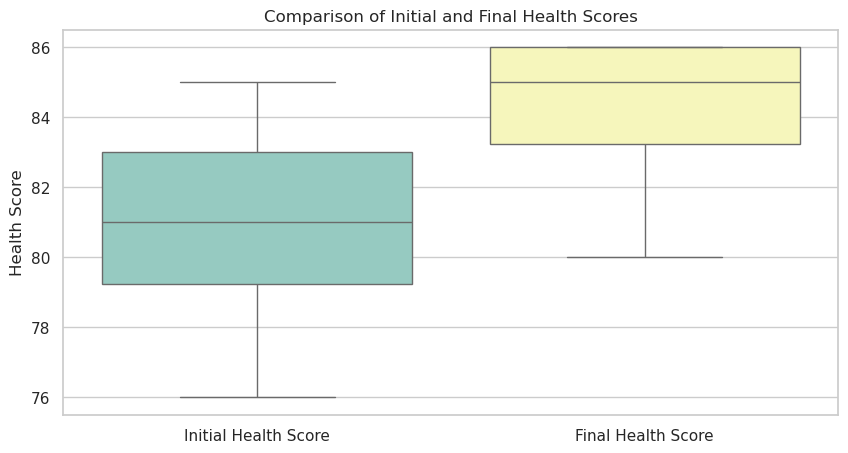

Mean difference: 3.31
95% Confidence Interval: (1.20, 5.40)
Reject the null hypothesis: The vaccine appears to be effective.


In [5]:
# Task 8 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data creation (replace this with reading from your CSV file in practice)
data = {
    "PatientID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Age": [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    "Gender": ["M", "F", "M", "F", "M", "F", "M", "F", "M", "F"],
    "InitialHealthScore": [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    "FinalHealthScore": [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

# Create DataFrame
df = pd.DataFrame(data)

# Set the style of seaborn
sns.set(style="whitegrid")

# Visualizing initial and final health scores
plt.figure(figsize=(10, 5))
sns.boxplot(data=[df['InitialHealthScore'], df['FinalHealthScore']], 
            palette="Set3", orient='v')

plt.xticks([0, 1], ['Initial Health Score', 'Final Health Score'])
plt.ylabel('Health Score')
plt.title('Comparison of Initial and Final Health Scores')

# Save the figure to a file with specified format and resolution
plt.savefig('health_scores_comparison.png', format='png', dpi=300)  # Change the filename as needed
plt.show()

# Set the random seed for reproducibility
np.random.seed(42)

# Function to perform bootstrapping
def bootstrap_mean_diff(initial_scores, final_scores, n_iterations=10000):
    diffs = []
    for _ in range(n_iterations):
        boot_initial = np.random.choice(initial_scores, size=len(initial_scores), replace=True)
        boot_final = np.random.choice(final_scores, size=len(final_scores), replace=True)
        diff = np.mean(boot_final) - np.mean(boot_initial)
        diffs.append(diff)
    return np.array(diffs)

# Extract initial and final health scores
initial_scores = df['InitialHealthScore']
final_scores = df['FinalHealthScore']

# Perform bootstrapping
boot_diffs = bootstrap_mean_diff(initial_scores, final_scores)

# Calculate the confidence intervals
lower_bound = np.percentile(boot_diffs, 2.5)
upper_bound = np.percentile(boot_diffs, 97.5)
mean_diff = np.mean(boot_diffs)

# Displaying results
print(f"Mean difference: {mean_diff:.2f}")
print(f"95% Confidence Interval: ({lower_bound:.2f}, {upper_bound:.2f})")

# Conclusion
if lower_bound > 0:
    print("Reject the null hypothesis: The vaccine appears to be effective.")
elif upper_bound < 0:
    print("Reject the null hypothesis: The vaccine appears to be effective.")
else:
    print("Fail to reject the null hypothesis: No evidence that the vaccine is effective.")



In [ ]:
# Task 8 continuation

# The null hypothesis implies that the vaccine does not significantly change health scores. Rejecting it indicates that the vaccine is effective
# After looking at the 95% confidence interval we can see that it does not include 0 meaning we reject the null hypothesis, meaning the vaccine does appear to be effective. 
# However there are a number of factors that could limit reliability such as the very small sample size of 10 patients. A larger sample size could enhace generalizability for the whole population. To add to that, there are many external variables such as lifestyle which may influence health scores and affect this study. 